### Домашнее задание к уроку 2<a class="anchor" id="hw"></a><center>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

__Задача:__ предсказание баллов ЕГЭ ученика

In [22]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [23]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [27]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [28]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17
0.9999999999999999


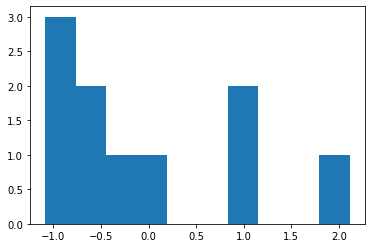

In [30]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

In [31]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [34]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
# ******
        dReg = reg * np.sign(W) # градиент регуляризации
#         dReg = reg * W # градиент регуляризации
# ******
        
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [37]:
gradient_descent_reg_l1(X_st, y, 20000)

Iter: 0, weights: [-0.65421135 -2.08768682 -0.20828876 -1.46123359], error 3521.5650732103436
Iter: 2000, weights: [18.18991905  1.51695526  3.07095432  2.01990411], error 1526.5912246894793
Iter: 4000, weights: [30.82101209  2.94913947  4.06685052  3.26334787], error 693.0762825287862
Iter: 6000, weights: [39.28754824  3.59812002  4.26592031  3.722098  ], error 326.18374133693123
Iter: 8000, weights: [44.96261011  3.95621952  4.19239588  3.90836655], error 162.08830198629886
Iter: 10000, weights: [48.76656566  4.1988276   4.03075231  4.00224663], error 88.28047001344615
Iter: 12000, weights: [51.31633132  4.38924341  3.8455422   4.06664568], error 54.95746315824321
Iter: 14000, weights: [53.02542197  4.55103271  3.65902219  4.12317577], error 39.832769412144245
Iter: 16000, weights: [54.17101387  4.69359676  3.47856056  4.17894335], error 32.90143555815894
Iter: 18000, weights: [54.93889636  4.82121653  3.30631119  4.23600078], error 29.666927573486873
Final MSE: 28.1068413969896


array([55.45339348,  4.936205  ,  3.1427051 ,  4.29464629])

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Нормализация** заключается в приведении признаков к масштабу в диапазоне [0-1].

**Стандартизация** заключается в получении своего рода значения сдвига каждого признака от среднего. Для ее реализации необходимо вычислить среднее значение признака

In [38]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [39]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [41]:
X1 = X.copy().astype('float')
X1

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [43]:
X1[:, 1:]

array([[1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 7.00e+02, 1.00e+00],
       [2.00e+00, 7.50e+02, 2.00e+00],
       [5.00e+00, 6.00e+02, 1.00e+00],
       [3.00e+00, 1.45e+03, 2.00e+00],
       [0.00e+00, 8.00e+02, 1.00e+00],
       [5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 4.50e+02, 1.00e+00],
       [2.00e+00, 1.00e+03, 2.00e+00]])

In [46]:
X_norm = min_max_scale(X1[:, 1:])
X_norm

array([[5.00e-04, 2.50e-01, 5.00e-04],
       [5.00e-04, 3.50e-01, 5.00e-04],
       [1.00e-03, 3.75e-01, 1.00e-03],
       [2.50e-03, 3.00e-01, 5.00e-04],
       [1.50e-03, 7.25e-01, 1.00e-03],
       [0.00e+00, 4.00e-01, 5.00e-04],
       [2.50e-03, 7.50e-01, 1.50e-03],
       [5.00e-03, 1.00e+00, 1.50e-03],
       [5.00e-04, 2.25e-01, 5.00e-04],
       [1.00e-03, 5.00e-01, 1.00e-03]])

In [47]:
X_norm_std = standard_scale(X_norm)
X_norm_std

array([[-0.60601512,  0.32283164, -0.60601512],
       [-0.60601512,  0.69511491, -0.60601512],
       [-0.6041537 ,  0.78818573, -0.6041537 ],
       [-0.59856945,  0.50897328, -0.60601512],
       [-0.60229229,  2.09117718, -0.6041537 ],
       [-0.60787654,  0.88125655, -0.60601512],
       [-0.59856945,  2.184248  , -0.60229229],
       [-0.58926237,  3.11495618, -0.60229229],
       [-0.60601512,  0.22976083, -0.60601512],
       [-0.6041537 ,  1.25353982, -0.6041537 ]])

In [48]:
X_std = standard_scale(X1[:, 1:])
X_std

array([[-0.60601512,  0.32283164, -0.60601512],
       [-0.60601512,  0.69511491, -0.60601512],
       [-0.6041537 ,  0.78818573, -0.6041537 ],
       [-0.59856945,  0.50897328, -0.60601512],
       [-0.60229229,  2.09117718, -0.6041537 ],
       [-0.60787654,  0.88125655, -0.60601512],
       [-0.59856945,  2.184248  , -0.60229229],
       [-0.58926237,  3.11495618, -0.60229229],
       [-0.60601512,  0.22976083, -0.60601512],
       [-0.6041537 ,  1.25353982, -0.6041537 ]])

In [49]:
X_std_norm = min_max_scale(X_norm)
X_std_norm

array([[5.00e-04, 2.50e-01, 5.00e-04],
       [5.00e-04, 3.50e-01, 5.00e-04],
       [1.00e-03, 3.75e-01, 1.00e-03],
       [2.50e-03, 3.00e-01, 5.00e-04],
       [1.50e-03, 7.25e-01, 1.00e-03],
       [0.00e+00, 4.00e-01, 5.00e-04],
       [2.50e-03, 7.50e-01, 1.50e-03],
       [5.00e-03, 1.00e+00, 1.50e-03],
       [5.00e-04, 2.25e-01, 5.00e-04],
       [1.00e-03, 5.00e-01, 1.00e-03]])

In [50]:
X_std_norm==X_norm

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Применение и нормализации и стандартизации смысла не имеет, тк результат получится стандартизированным или нормализированным в зависимости от того, какое последнее действие применялось

3. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [56]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=10000, n_features=6, n_informative=4, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[23.94447414,  0.09866979, -0.08230335,  1.08684397,  0.33313156,
        -0.24563563],
       [-3.10720787,  0.921454  , -0.78711664, -1.29237081,  0.09521391,
         0.76748414],
       [-7.65635273, -1.21132525, -0.7657352 , -1.43740918, -1.06389903,
         0.6312587 ],
       ...,
       [15.63148112,  0.36080703, -0.39625614, -1.39258246,  0.86324297,
         0.3773388 ],
       [-7.0332535 ,  0.93872439, -0.76435632, -0.76871467, -0.92984876,
        -0.45655575],
       [-2.33956667,  1.32441809, -0.93204802,  1.11278493,  0.35166652,
        -0.72235735]])

array([  58.21333576,   85.86598167, -149.82372392, ...,   78.47459103,
         20.22474186,   47.8893847 ])

array([29.48426144, 99.65600277, 49.17659377,  0.        ,  0.        ,
       54.47326147])

In [57]:
X = standard_scale(X)

In [65]:
init_W = np.random.randn(X.shape[1])
init_W

array([-0.43706345, -1.08767303,  0.33684821, -0.52841549,  0.41417911,
       -1.64718606])

In [66]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors=[]
    w_list = [W.copy()]
    for i in range(0, iterations):
        inds = np.random.randint(n, size=size)

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]


        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))
        errors.append(err)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [67]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors=[]
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        errors.append(err)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list